<a href="https://colab.research.google.com/github/AucaCoyan/Python-Quant/blob/main/buyTheDip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

[*********************100%***********************]  12 of 12 completed




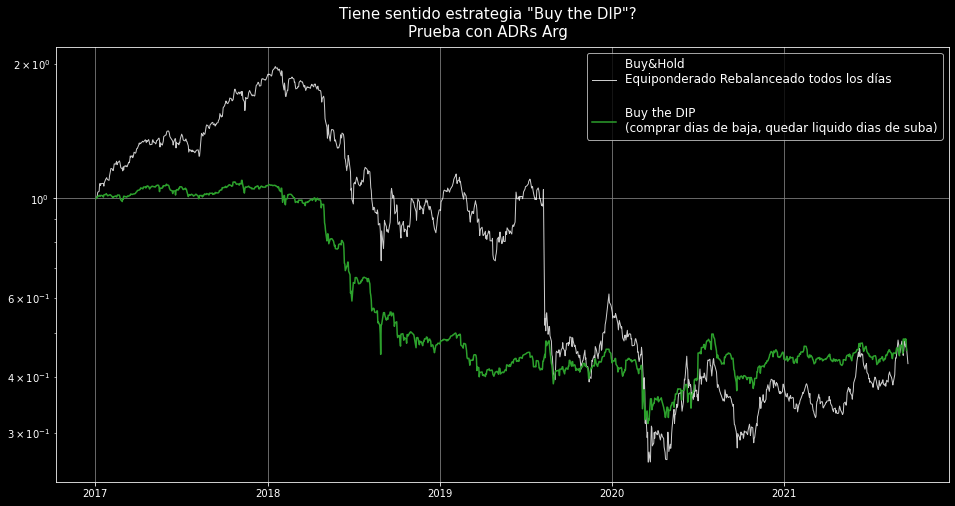

In [ ]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

tickers = ['GGAL','BMA','BBAR','PAM','YPF','TGS','TEO','EDN','CEPU','CRESY','LOMA','SUPV']
tickers.sort()
data_adrs = yf.download(tickers, auto_adjust=True, start='2017-01-01')['Close']

ret_adrs = np.where(data_adrs < data_adrs.shift(), (data_adrs.shift(-1)/data_adrs-1), 0)
res_estrategia = pd.DataFrame(ret_adrs, columns=tickers, index=data_adrs.index)

portfolio_eqipond_reb =  data_adrs.pct_change().mean(axis=1).add(1).cumprod()
estrategia = res_estrategia.mean(axis=1).add(1).cumprod()

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(16,8), nrows=1)
ax.plot(portfolio_eqipond_reb, c='white', lw=1, alpha=0.8, label='Buy&Hold \nEquiponderado Rebalanceado todos los días\n')
ax.plot(estrategia,  color='tab:green', label='Buy the DIP \n(comprar dias de baja, quedar liquido dias de suba)')
ax.legend(fontsize=12)
ax.set_yscale('log')
ax.grid(color=(0.5, 0.5, 0.5))
plt.suptitle('Tiene sentido estrategia "Buy the DIP"?\nPrueba con ADRs Arg', y=0.95, fontsize=15)
print('\n')
plt.show()

In [ ]:
# Con los del SP500

sp500_wiki = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
tickers = list(sp500_wiki.Symbol)
tickers = [x.replace('.','-') for x in tickers]

tickers.sort()
data = yf.download(tickers, auto_adjust=True, start='2005-01-01')['Close']

[*********************100%***********************]  505 of 505 completed


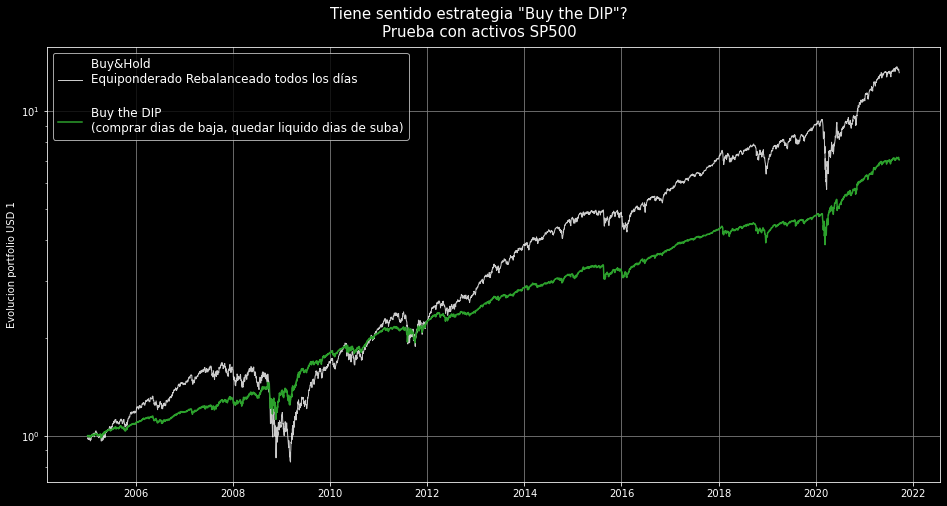

In [ ]:
ret = np.where(data < data.shift(), (data.shift(-1)/data - 1), 0)
res_estrategia = pd.DataFrame(ret, columns=tickers, index=data.index)

portfolio_eqipond_reb =  data.pct_change().mean(axis=1).add(1).cumprod()
estrategia = res_estrategia.mean(axis=1).add(1).cumprod()

fig, ax = plt.subplots(figsize=(16,8), nrows=1)
ax.plot(portfolio_eqipond_reb, c='white', lw=1, alpha=0.8, label='Buy&Hold \nEquiponderado Rebalanceado todos los días\n')
ax.plot(estrategia,  color='tab:green', label='Buy the DIP \n(comprar dias de baja, quedar liquido dias de suba)')
ax.legend(fontsize=12)
ax.set_yscale('log')
ax.grid(color=(0.5, 0.5, 0.5))
ax.set_ylabel('Evolucion portfolio USD 1')
plt.suptitle('Tiene sentido estrategia "Buy the DIP"?\nPrueba con activos SP500', y=0.95, fontsize=15)
print('\n')
plt.show()

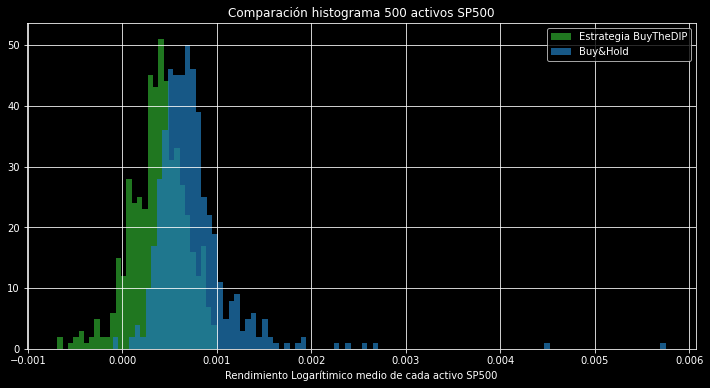

In [ ]:
ret = np.where(data < data.shift(), np.log(data.shift(-1)/data), 0)
res_estrategia = pd.DataFrame(ret, columns=tickers, index=data.index)

portfolio_eqipond_reb =  data.pct_change().mean(axis=1).add(1).cumprod()
estrategia = res_estrategia.mean(axis=1).add(1).cumprod()


fig, ax = plt.subplots(figsize=(12,6))
res_estrategia.mean().hist(bins=30, color='tab:green', alpha=0.75, label='Estrategia BuyTheDIP', ax=ax)
data.pct_change().mean().hist(bins=100, color='tab:blue', alpha=0.75, label='Buy&Hold', ax=ax)
ax.legend()
ax.set_title('Comparación histograma 500 activos SP500')
ax.set_xlabel('Rendimiento Logarítimico medio de cada activo SP500')
print('\n')
plt.show()